# Analyzing results

We will use python and this jupyter notebook to plot and analyze the results obtained from the
fortran source code.

## Plotting results

For this we will use the `numpy` and `matplotlib.pyplot` packages

In [1]:
# Importing numpy and matplotlib
import numpy as np 
import matplotlib.pyplot as plt
import f90nml

In [2]:
# different styles are predefined that give different appearance to the plots. This one emulates the style of 
# the figures you'll find on statisical analysis news site fivethirtyeight.com
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn')

# Wave Function In a Box

In [3]:
# reading data stored in zero_density_results.dat

file_name = 'zero_density_results.dat'

# loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
# we use skiprows=1 to avoid the header
all_data = np.loadtxt(file_name,skiprows=1)

# We transpose the array in order to be able to extract each column individually
all_data = all_data.transpose()

x_sample_points = all_data[0]
initial_state = all_data[1] # initial wave function
time_step_1 = all_data[33] # wave function after 1.65 seconds
time_step_2 = all_data[67] # wave function after 3.35 seconds
time_step_3 = all_data[100] # wave function after 5 seconds


### Initial Conditions

In [4]:
# Read the values from the namelist file
parameters = f90nml.read('wave_parameters.namelist')

length = parameters['integration']['length']
n_points = parameters['integration']['n_points']
n_steps = parameters['integration']['n_steps']
delta_t = parameters['integration']['delta_t']

initial_width = parameters['wave_function']['width']
center = parameters['wave_function']['center']

k = parameters['oscillator']['k_oscillator']

# Show the initial conditions 
print('Length of the box: ' + str(length))
print('Inital Width: ' + str(initial_width))
print('Center of the initial Gaussian: ' + str(center))
print('Step Size: ' + str(delta_t))
print('Number of Points: ' + str(n_points) + ' | Number of Steps: ' + str(n_steps))

Length of the box: 5.0
Inital Width: 0.5
Center of the initial Gaussian: 0.0
Step Size: 0.05
Number of Points: 100 | Number of Steps: 100


### Plot as a function of the number of the sample points

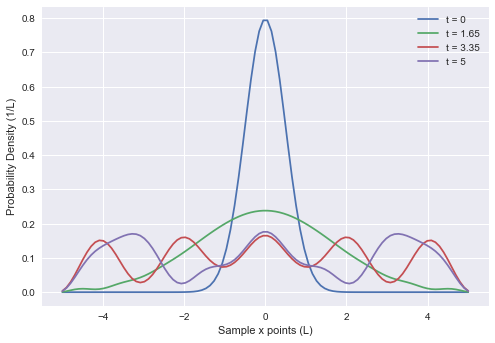

In [5]:
#
plt.plot(x_sample_points, initial_state, label='t = 0')
plt.plot(x_sample_points, time_step_1, label='t = 1.65')
plt.plot(x_sample_points, time_step_2, label='t = 3.35')
plt.plot(x_sample_points, time_step_3, label='t = 5')

plt.xlabel('Sample x points (L)')
plt.ylabel('Probability Density (1/L)')
# legend displays the labels given in each plot
plt.legend()
plt.show()


### Animating the Plot

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

fig, ax = plt.subplots()
ax.axis([-5,5,0,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(x_sample_points[:], all_data[i+1])

ani = matplotlib.animation.FuncAnimation(fig, animate, interval=50, frames=len(all_data)-1)
plt.close()

from IPython.display import HTML
HTML(ani.to_jshtml())

## Expectation Values

In [7]:
# reading data stored in zero_time_results.dat

file_name = 'zero_time_results.dat'

# loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
# we use skiprows=1 to avoid the header
all_data = np.loadtxt(file_name,skiprows=1)

# We transpose the array in order to be able to extract each column individually
all_data = all_data.transpose()

time = all_data[0]
norm = all_data[1]
position = all_data[2]
width = all_data[3]
analytic_width = all_data[4]


### Plot the figures

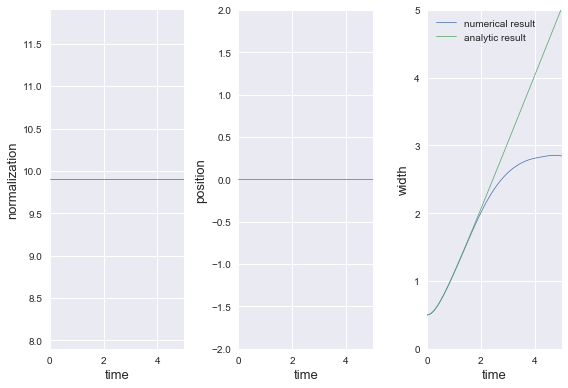

In [8]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Settings for plot 1
ax1.plot(time, norm, linewidth = .75)
ax1.set_title('', size= 12)
ax1.set_xlim([0, time[-1]])
ax1.set_ylim(-2 + min(norm), 2 + max(norm))
ax1.set_xlabel('time', fontsize = 13.0)
ax1.set_ylabel('normalization', fontsize = 13.0)

# Settings for plot 2
ax2.plot(time, position, linewidth = .75)
ax2.set_title('', size= 12)
ax2.set_xlim([0, time[-1]])
ax2.set_ylim(-2 + min(position), 2 + max(position))
ax2.set_xlabel('time', fontsize = 13.0)
ax2.set_ylabel('position', fontsize = 13.0)

# Settings for plot 3
ax3.plot(time, width, linewidth = .75, label='numerical result')
ax3.plot(time, analytic_width, linewidth = .75, label='analytic result')
ax3.set_title('', size= 12)
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)
ax3.set_xlabel('time', fontsize = 13.0)
ax3.set_ylabel('width', fontsize = 13.0)
ax3.legend()

#plt.axis('scaled')
plt.tight_layout()
plt.show()

# Wave Function In a Harmonic Well Set 1

In [9]:
# reading data stored in harmonic_well_1_density_results.dat

file_name = 'harmonic_well_1_density_results.dat'

# loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
# we use skiprows=1 to avoid the header
all_data = np.loadtxt(file_name,skiprows=1)

# We transpose the array in order to be able to extract each column individually
all_data = all_data.transpose()

x_sample_points = all_data[0]
initial_state = all_data[1] # initial wave function
time_step_1 = all_data[33] # wave function after 1.65 seconds
time_step_2 = all_data[67] # wave function after 3.35 seconds
time_step_3 = all_data[100] # wave function after 5 seconds

### Initial Conditions

In [10]:
# Read the values from the namelist file
parameters = f90nml.read('harmonic_1_wave_parameters.namelist')

length = parameters['integration']['length']
n_points = parameters['integration']['n_points']
n_steps = parameters['integration']['n_steps']
delta_t = parameters['integration']['delta_t']

initial_width = parameters['wave_function']['width']
center = parameters['wave_function']['center']

k = parameters['oscillator']['k_oscillator']

# Show the initial conditions 
print('Length of the box: ' + str(length))
print('Inital Width: ' + str(initial_width))
print('Center of the initial Gaussian: ' + str(center))
print('Constant k: ' + str(k))
print('Step Size: ' + str(delta_t))
print('Number of Points: ' + str(n_points) + ' | Number of Steps: ' + str(n_steps))

Length of the box: 5.0
Inital Width: 0.5
Center of the initial Gaussian: 0.0
Constant k: 1.0
Step Size: 0.05
Number of Points: 100 | Number of Steps: 100


### Plot as a function of the number of the sample points

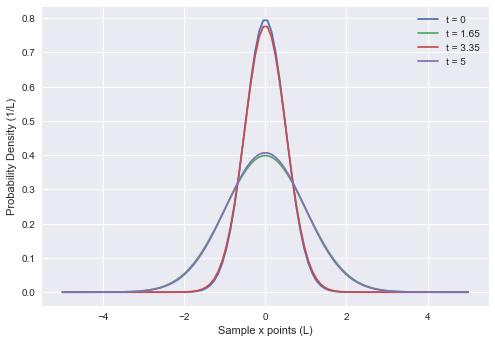

In [11]:
#
plt.plot(x_sample_points, initial_state, label='t = 0')
plt.plot(x_sample_points, time_step_1, label='t = 1.65')
plt.plot(x_sample_points, time_step_2, label='t = 3.35')
plt.plot(x_sample_points, time_step_3, label='t = 5')

plt.xlabel('Sample x points (L)')
plt.ylabel('Probability Density (1/L)')
# legend displays the labels given in each plot
plt.legend()
plt.show()

### Animating the plot

In [12]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

fig, ax = plt.subplots()
ax.axis([-5,5,0,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(x_sample_points[:], all_data[i+1])

ani = matplotlib.animation.FuncAnimation(fig, animate, interval=50, frames=len(all_data)-1)
plt.close()

from IPython.display import HTML
HTML(ani.to_jshtml())

## Expectation Values

In [13]:
# reading data stored in harmonic_well_1_time_results.dat

file_name = 'harmonic_well_1_time_results.dat'

# loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
# we use skiprows=1 to avoid the header
all_data = np.loadtxt(file_name,skiprows=1)

# We transpose the array in order to be able to extract each column individually
all_data = all_data.transpose()

time = all_data[0]
norm = all_data[1]
position = all_data[2]
width = all_data[3]
analytic_position = all_data[4]

### Plot the figures

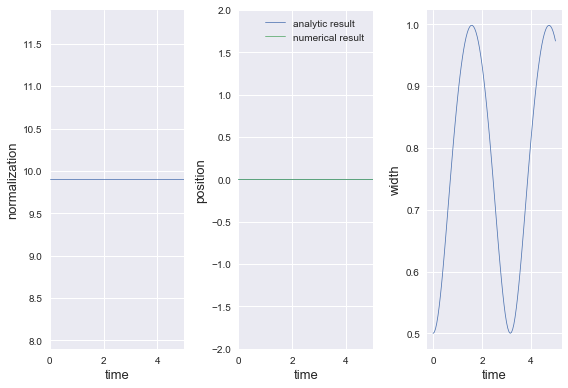

In [14]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Settings for plot 1
ax1.plot(time, norm, linewidth = .75)
ax1.set_title('', size= 12)
ax1.set_xlim([0, time[-1]])
ax1.set_ylim(-2 + min(norm), 2 + max(norm))
ax1.set_xlabel('time', fontsize = 13.0)
ax1.set_ylabel('normalization', fontsize = 13.0)

# Settings for plot 2
ax2.plot(time, analytic_position, linewidth = .75, label='analytic result')
ax2.plot(time, position, linewidth = .75, label='numerical result')
ax2.set_title('', size= 12)
ax2.set_xlim([0, time[-1]])
ax2.set_ylim(-2 + min(position), 2 + max(position))
ax2.set_xlabel('time', fontsize = 13.0)
ax2.set_ylabel('position', fontsize = 13.0)
ax2.legend()

# Settings for plot 3
ax3.plot(time, width, linewidth = .75)
ax3.set_title('', size= 12)
#ax3.set_xlim(0, 5)
#ax3.set_ylim(0, 5)
ax3.set_xlabel('time', fontsize = 13.0)
ax3.set_ylabel('width', fontsize = 13.0)
#ax3.legend()

#plt.axis('scaled')
plt.tight_layout()
plt.show()

# Wave Function In a Harmonic Well Set 2

In [15]:
# reading data stored in harmonic_well_2_density_results.dat

file_name = 'harmonic_well_2_density_results.dat'

# loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
# we use skiprows=1 to avoid the header
all_data = np.loadtxt(file_name,skiprows=1)

# We transpose the array in order to be able to extract each column individually
all_data = all_data.transpose()

x_sample_points = all_data[0]
initial_state = all_data[1] # initial wave function
time_step_1 = all_data[33] # wave function after 1.65 seconds
time_step_2 = all_data[67] # wave function after 3.35 seconds
time_step_3 = all_data[100] # wave function after 5 seconds

### Initial Conditions

In [16]:
# Read the values from the namelist file
parameters = f90nml.read('harmonic_2_wave_parameters.namelist')

length = parameters['integration']['length']
n_points = parameters['integration']['n_points']
n_steps = parameters['integration']['n_steps']
delta_t = parameters['integration']['delta_t']

initial_width = parameters['wave_function']['width']
center = parameters['wave_function']['center']

k = parameters['oscillator']['k_oscillator']

# Show the initial conditions 
print('Length of the box: ' + str(length))
print('Inital Width: ' + str(initial_width))
print('Center of the initial Gaussian: ' + str(center))
print('Constant k: ' + str(k))
print('Step Size: ' + str(delta_t))
print('Number of Points: ' + str(n_points) + ' | Number of Steps: ' + str(n_steps))

Length of the box: 5.0
Inital Width: 2.15
Center of the initial Gaussian: -0.5
Constant k: 1.0
Step Size: 0.05
Number of Points: 100 | Number of Steps: 100


### Plot as a function of the number of the sample points

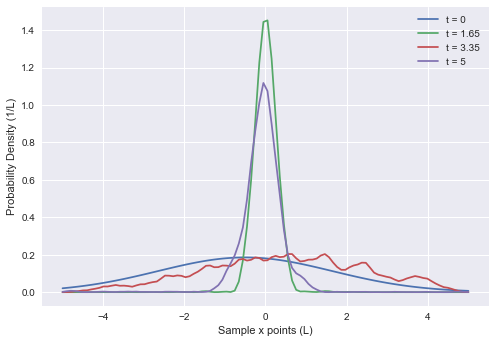

In [17]:
#
plt.plot(x_sample_points, initial_state, label='t = 0')
plt.plot(x_sample_points, time_step_1, label='t = 1.65')
plt.plot(x_sample_points, time_step_2, label='t = 3.35')
plt.plot(x_sample_points, time_step_3, label='t = 5')

plt.xlabel('Sample x points (L)')
plt.ylabel('Probability Density (1/L)')
# legend displays the labels given in each plot
plt.legend()
plt.show()

### Animating the plot

In [18]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

fig, ax = plt.subplots()
ax.axis([-5,5,0,2])
l, = ax.plot([],[])

def animate(i):
    l.set_data(x_sample_points[:], all_data[i+1])

ani = matplotlib.animation.FuncAnimation(fig, animate, interval=50, frames=len(all_data)-1)
plt.close()

from IPython.display import HTML
HTML(ani.to_jshtml())

## Expectation Values

In [19]:
# reading data stored in harmonic_well_2_time_results.dat

file_name = 'harmonic_well_2_time_results.dat'

# loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
# we use skiprows=1 to avoid the header
all_data = np.loadtxt(file_name,skiprows=1)

# We transpose the array in order to be able to extract each column individually
all_data = all_data.transpose()

time = all_data[0]
norm = all_data[1]
position = all_data[2]
width = all_data[3]
analytic_position = all_data[4]

### Plot the figures

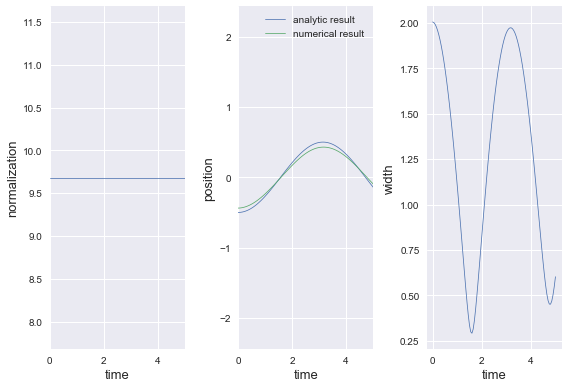

In [20]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Settings for plot 1
ax1.plot(time, norm, linewidth = .75)
ax1.set_title('', size= 12)
ax1.set_xlim([0, time[-1]])
ax1.set_ylim(-2 + min(norm), 2 + max(norm))
ax1.set_xlabel('time', fontsize = 13.0)
ax1.set_ylabel('normalization', fontsize = 13.0)

# Settings for plot 2
ax2.plot(time, analytic_position, linewidth = .75, label='analytic result')
ax2.plot(time, position, linewidth = .75, label='numerical result')
ax2.set_title('', size= 12)
ax2.set_xlim([0, time[-1]])
ax2.set_ylim(-2 + min(position), 2 + max(position))
ax2.set_xlabel('time', fontsize = 13.0)
ax2.set_ylabel('position', fontsize = 13.0)
ax2.legend()

# Settings for plot 3
ax3.plot(time, width, linewidth = .75)
ax3.set_title('', size= 12)
#ax3.set_xlim(0, 5)
#ax3.set_ylim(0, 5)
ax3.set_xlabel('time', fontsize = 13.0)
ax3.set_ylabel('width', fontsize = 13.0)
#ax3.legend()

#plt.axis('scaled')
plt.tight_layout()
plt.show()

# Wave Function In a Harmonic Well Set 3

In [21]:
# reading data stored in harmonic_well_3_density_results.dat

file_name = 'harmonic_well_3_density_results.dat'

# loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
# we use skiprows=1 to avoid the header
all_data = np.loadtxt(file_name,skiprows=1)

# We transpose the array in order to be able to extract each column individually
all_data = all_data.transpose()

x_sample_points = all_data[0]
initial_state = all_data[1] # initial wave function
time_step_1 = all_data[33] # wave function after 1.65 seconds
time_step_2 = all_data[67] # wave function after 3.35 seconds
time_step_3 = all_data[100] # wave function after 5 seconds

### Initial Conditions

In [22]:
# Read the values from the namelist file
parameters = f90nml.read('harmonic_3_wave_parameters.namelist')

length = parameters['integration']['length']
n_points = parameters['integration']['n_points']
n_steps = parameters['integration']['n_steps']
delta_t = parameters['integration']['delta_t']

initial_width = parameters['wave_function']['width']
center = parameters['wave_function']['center']

k = parameters['oscillator']['k_oscillator']

# Show the initial conditions 
print('Length of the box: ' + str(length))
print('Inital Width: ' + str(initial_width))
print('Center of the initial Gaussian: ' + str(center))
print('Constant k: ' + str(k))
print('Step Size: ' + str(delta_t))
print('Number of Points: ' + str(n_points) + ' | Number of Steps: ' + str(n_steps))

Length of the box: 5.0
Inital Width: 1.25
Center of the initial Gaussian: 1.0
Constant k: 1.0
Step Size: 0.05
Number of Points: 100 | Number of Steps: 100


### Plot as a function of the number of the sample points

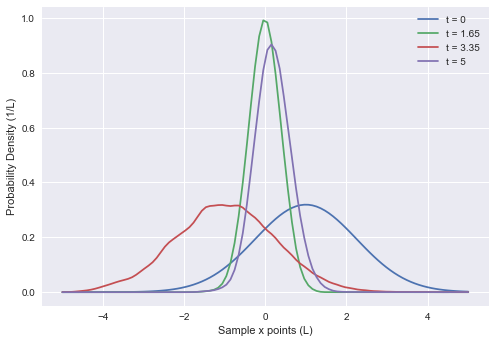

In [23]:
#
plt.plot(x_sample_points, initial_state, label='t = 0')
plt.plot(x_sample_points, time_step_1, label='t = 1.65')
plt.plot(x_sample_points, time_step_2, label='t = 3.35')
plt.plot(x_sample_points, time_step_3, label='t = 5')

plt.xlabel('Sample x points (L)')
plt.ylabel('Probability Density (1/L)')
# legend displays the labels given in each plot
plt.legend()
plt.show()

### Animating the plot

In [24]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

fig, ax = plt.subplots()
ax.axis([-5,5,0,2])
l, = ax.plot([],[])

def animate(i):
    l.set_data(x_sample_points[:], all_data[i+1])

ani = matplotlib.animation.FuncAnimation(fig, animate, interval=50, frames=len(all_data)-1)
plt.close()

from IPython.display import HTML
HTML(ani.to_jshtml())

## Expectation Values

In [25]:
# reading data stored in harmonic_well_3_time_results.dat

file_name = 'harmonic_well_3_time_results.dat'

# loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
# we use skiprows=1 to avoid the header
all_data = np.loadtxt(file_name,skiprows=1)

# We transpose the array in order to be able to extract each column individually
all_data = all_data.transpose()

time = all_data[0]
norm = all_data[1]
position = all_data[2]
width = all_data[3]
analytic_position = all_data[4]

### Plot the figures

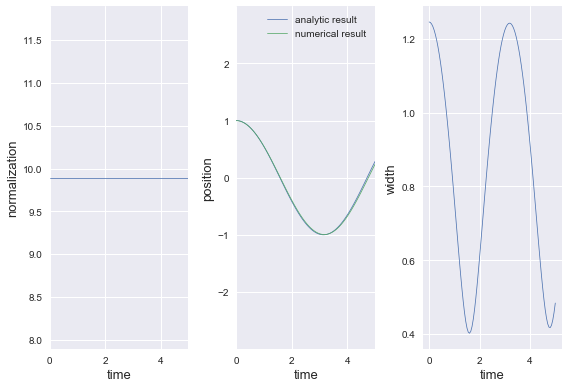

In [26]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Settings for plot 1
ax1.plot(time, norm, linewidth = .75)
ax1.set_title('', size= 12)
ax1.set_xlim([0, time[-1]])
ax1.set_ylim(-2 + min(norm), 2 + max(norm))
ax1.set_xlabel('time', fontsize = 13.0)
ax1.set_ylabel('normalization', fontsize = 13.0)

# Settings for plot 2
ax2.plot(time, analytic_position, linewidth = .75, label='analytic result')
ax2.plot(time, position, linewidth = .75, label='numerical result')
ax2.set_title('', size= 12)
ax2.set_xlim([0, time[-1]])
ax2.set_ylim(-2 + min(position), 2 + max(position))
ax2.set_xlabel('time', fontsize = 13.0)
ax2.set_ylabel('position', fontsize = 13.0)
ax2.legend()

# Settings for plot 3
ax3.plot(time, width, linewidth = .75)
ax3.set_title('', size= 12)
#ax3.set_xlim(0, 5)
#ax3.set_ylim(0, 5)
ax3.set_xlabel('time', fontsize = 13.0)
ax3.set_ylabel('width', fontsize = 13.0)
#ax3.legend()

#plt.axis('scaled')
plt.tight_layout()
plt.show()